#Job Market in Kenya
Analyzing  the job market in Kenya using data scrapped from Twitter on Available Job offering.

My goal is to extract data from most common job opportunities listed on Twitter, clean the data and find it's credibility

## Defining the Problem
Getting relevant job opportunities vs spam


In [1]:
pip install tweet-preprocessor

##Importing Libraries

In [2]:
#Getting the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt #viz
import seaborn as sns #viz
sns.set_style('whitegrid')
%matplotlib inline
import numpy as np
import re #regular expression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from collections import Counter 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import preprocessor as p


In [3]:
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

##Importing  Data

Data has already been scraped from Twitter. The data collected from tweets between September to October 2020

Data collected has the tweets, username and specific location. This data was collected in two ways:-

*    data from specific hashtags and keywords: '#ikokazi', 'Iko Kazi KE', '#ikokazike', '#IkoKaziKE', '#ikokaziKE',' #ajiraKE' '#PataKaziKE'
*    data from specific accounts: 'ikokaziKE, ikokaziKenya, KaziQuest and AjiraKE'

The links to data scrapping from Twitter can be found at: [Individual user tweets scrapping](https://colab.research.google.com/drive/1x7id5SP6X4RBtTbwkC7gKAvMVNJstvCS?usp=sharing) and [Search words tweets scrapping](https://colab.research.google.com/drive/1mJmg7q5SmdBeS5isH_6gor3Kn9WvRSCA?usp=sharing)



In [4]:
#adding google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#importing data from my drive, combining them and reading it's contents
df = pd.read_csv('/content/drive/My Drive/tweets.csv')
df2 = pd.read_csv('/content/drive/My Drive/data.csv')
df1 = pd.read_csv('/content/drive/My Drive/data1.csv')
df3 = pd.read_csv('/content/drive/My Drive/datafinal.csv')
df4 = pd.read_csv('/content/drive/My Drive/ikokaziKE.csv')
df6 = pd.read_csv('/content/drive/My Drive/KaziQuest.csv')
df5 = pd.read_csv('/content/drive/My Drive/ikokaziKenya.csv')
df7 = pd.read_csv('/content/drive/My Drive/datafinal2.csv')
df8 = pd.read_csv('/content/drive/My Drive/datafinl2.csv')
df9 = pd.read_csv('/content/drive/My Drive/ikokaziKenyar.csv')
df10 = pd.read_csv('/content/drive/My Drive/ikokaziKEF.csv')
df11 = pd.read_csv('/content/drive/My Drive/ajiraKE.csv')
dtframes = [df, df2, df1, df3, df4, df5, df6, df7, df8, df9, df10, df11]
tweets_df = pd.concat(dtframes)
tweets_df.head()

,Unnamed: 0,User,Location,Tweet
0,0,ikokaziKE,Kenya,Are you a qualified graphic designers akiChest...
1,1,ikokaziKE,Kenya,Are you a qualified ba Finance501 just posted ...
2,2,ikokaziKE,Kenya,Are you a qualified finance Finance501 just po...
3,3,ikokaziKE,Kenya,Are you a qualified graphic design virtualpay ...
4,4,ikokaziKE,Kenya,Are you a qualified digital marketing officer ...


In [6]:
#Exporting data to my drive 
# tweets_df.to_csv('kazifinal.csv')
# !cp kazifinal.csv "drive/My Drive/"

##High level Cleaning of the Data

What is wrong with the data?

*   The row 'Unamed: o' is irrelevants
*   The Data contains a lot of duplicated tweets
* Converting text data to string



In [7]:
#removing unamed:0 column
tweets_df = tweets_df.drop([ 'Unnamed: 0'], axis=1)
tweets_df

,User,Location,Tweet
0,ikokaziKE,Kenya,Are you a qualified graphic designers akiChest...
1,ikokaziKE,Kenya,Are you a qualified ba Finance501 just posted ...
2,ikokaziKE,Kenya,Are you a qualified finance Finance501 just po...
3,ikokaziKE,Kenya,Are you a qualified graphic design virtualpay ...
4,ikokaziKE,Kenya,Are you a qualified digital marketing officer ...
...,...,...,...
137,ajiraKE,"Nairobi, Kenya",GhettoRadio895 Sheng words zote ziko hapa gt M...
138,ajiraKE,"Nairobi, Kenya",ADELLEO and ShaffieWeru rocking on Kiss100keny...
139,ajiraKE,"Nairobi, Kenya",sunnysunwords english is not common sense Lets...
140,ajiraKE,"Nairobi, Kenya",Mwirigi coldtusker it should They are actually...


In [8]:
#checking the data overview
tweets_df.describe ()

,User,Location,Tweet
count,4560,3851,4559
unique,559,289,1700
top,KaziQuest,"Nairobi, Kenya",IkoKaziKE
freq,1279,1969,63


In [9]:
#removing tweets that have been duplicated
tweets_df.drop_duplicates(subset=['Tweet'])

,User,Location,Tweet
0,ikokaziKE,Kenya,Are you a qualified graphic designers akiChest...
1,ikokaziKE,Kenya,Are you a qualified ba Finance501 just posted ...
2,ikokaziKE,Kenya,Are you a qualified finance Finance501 just po...
3,ikokaziKE,Kenya,Are you a qualified graphic design virtualpay ...
4,ikokaziKE,Kenya,Are you a qualified digital marketing officer ...
...,...,...,...
137,ajiraKE,"Nairobi, Kenya",GhettoRadio895 Sheng words zote ziko hapa gt M...
138,ajiraKE,"Nairobi, Kenya",ADELLEO and ShaffieWeru rocking on Kiss100keny...
139,ajiraKE,"Nairobi, Kenya",sunnysunwords english is not common sense Lets...
140,ajiraKE,"Nairobi, Kenya",Mwirigi coldtusker it should They are actually...


In [10]:
#chcecking on the data types of each column
tweets_df.dtypes

User        object
Location    object
Tweet       object
dtype: object

In [11]:
#converting data type to string using astype (did not reallly work)
tweets_df['Tweet'] = tweets_df['Tweet'].astype(str)
tweets_df['User'] = tweets_df['User'].astype(str)
tweets_df['Location'] = tweets_df['Location'].astype(str)

tweets_df = tweets_df.astype(str)
tweets_df.dtypes

User        object
Location    object
Tweet       object
dtype: object

In [12]:
#converting the data to string
tweets_df.convert_dtypes(infer_objects=False).dtypes

User        string
Location    string
Tweet       string
dtype: object

##Visualizing the Data
Visualizing most frequent words using wordcloud and bargraph
 

In [13]:
#visualizing tweet data; most common words
stopwords = set(STOPWORDS)
tweets_combo = ' '
# instantiate a word cloud object
for val in tweets_df['Tweet']: 
          # typecaste each val to string 
    val = str(val) 
      # split the value 
    tokens = val.split() 
          # Converts each token into lowercase æææ
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    tweets_combo += " ".join(tokens)+" "

tweets_combo



' are you a qualified graphic designers akichester just posted a job you might be interested in are you a qualified ba finance501 just posted a job you might be interested in are you a qualified finance finance501 just posted a job you might be interested in are you a qualified graphic design virtualpay just posted a job you might be interested in are you a qualified digital marketing officer mutiiinda just posted a job you might be interested in are you a qualified office dibbankke just posted a job you might be interested in are you a qualified finance amp amp administration officer actionafricahi just posted a job you might be interested in are you a qualified intern giftedpwdcentre just posted a job you might be interested in are you a qualified intern simoningari just posted a job you might be interested in are you a qualified business administration manager superiorhomeske just posted a job you might be interested in are you a qualified human resource superiorhomeske just posted 

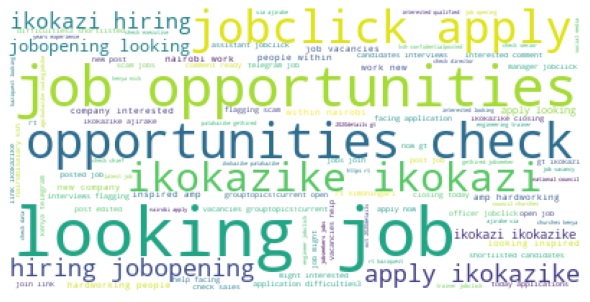

In [14]:
df_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)
# tweets_combo
# generate the word cloud
df_wc.generate(tweets_combo)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(df_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


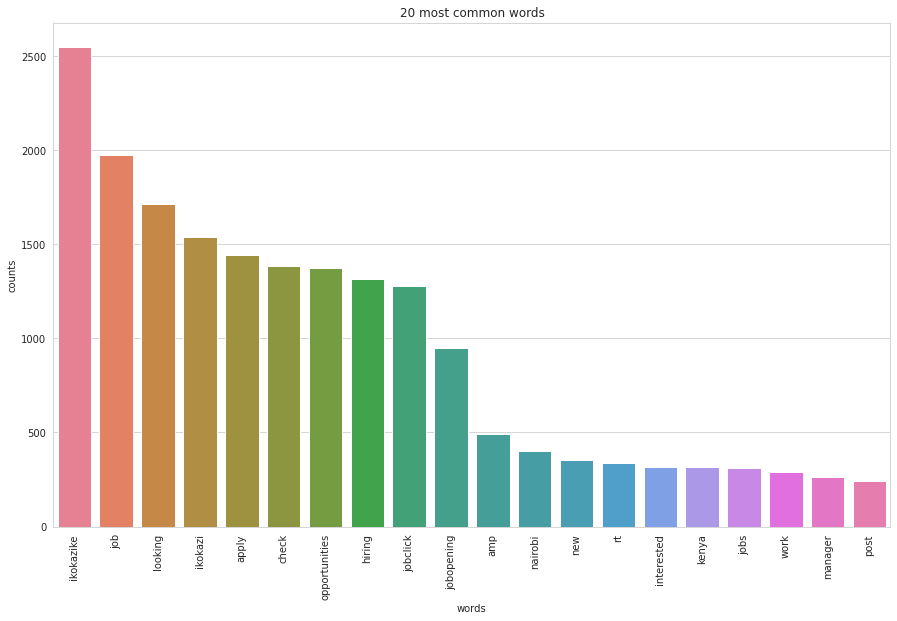

In [15]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the tweets
count_data = count_vectorizer.fit_transform(tweets_df['Tweet'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

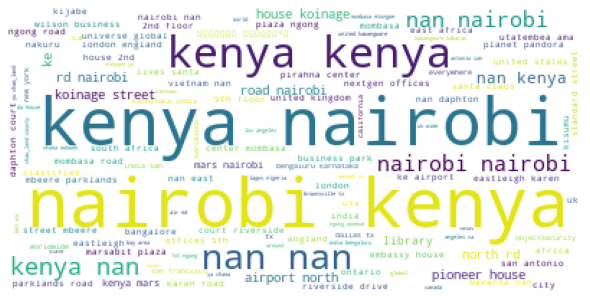

In [16]:
location_combo = ' '
# instantiate a word cloud object
for val in tweets_df['Location']: 
          # typecaste each val to string 
    val = str(val) 
      # split the value 
    tokens = val.split() 
          # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    location_combo += " ".join(tokens)+" "

df_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)
# tweets_combo
# generate the word cloud
df_wc.generate(location_combo)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(df_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

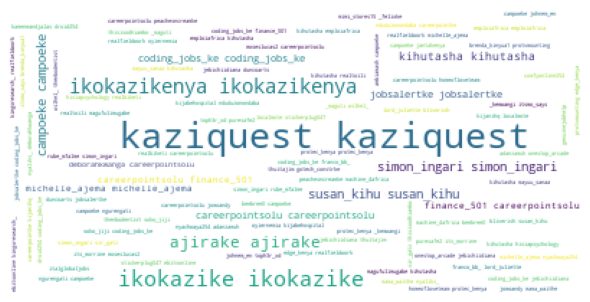

In [17]:
location_combo = ' '
# instantiate a word cloud object
for val in tweets_df['User']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    location_combo += " ".join(tokens)+" "

df_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)
# tweets_combo
# generate the word cloud
df_wc.generate(location_combo)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(df_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

##Text Preprocessing

The text data needs to undergo cleaning: 
*  Removing non-english words
* Removing stop words
*  Tokenization: splitting words in tweets
* Removing: punctuation, emojis, smileys etc

In [18]:
#removing non-english words
words = set(nltk.corpus.words.words())

def retain_eng(text):
    text  = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text

tweets_df['Tweet'] = tweets_df['Tweet'].apply(lambda x: retain_eng(x))
tweets_df.head(10)

,User,Location,Tweet
0,ikokaziKE,Kenya,Are you a qualified graphic just posted a job ...
1,ikokaziKE,Kenya,Are you a qualified ba Finance501 just posted ...
2,ikokaziKE,Kenya,Are you a qualified finance Finance501 just po...
3,ikokaziKE,Kenya,Are you a qualified graphic design just posted...
4,ikokaziKE,Kenya,Are you a qualified digital marketing officer ...
5,ikokaziKE,Kenya,Are you a qualified office just posted a job y...
6,ikokaziKE,Kenya,Are you a qualified finance administration off...
7,ikokaziKE,Kenya,Are you a qualified intern just posted a job y...
8,ikokaziKE,Kenya,Are you a qualified intern just posted a job y...
9,ikokaziKE,Kenya,Are you a qualified business administration ma...


In [19]:
#using text preprocessor to clean data

def pre_proc(text):
    text = p.clean(text)
    return text

tweets_df['Tweet_clean'] = tweets_df['Tweet'].apply(lambda x: pre_proc(x))
tweets_df.head()

,User,Location,Tweet,Tweet_clean
0,ikokaziKE,Kenya,Are you a qualified graphic just posted a job ...,Are you a qualified graphic just posted a job ...
1,ikokaziKE,Kenya,Are you a qualified ba Finance501 just posted ...,Are you a qualified ba Finance501 just posted ...
2,ikokaziKE,Kenya,Are you a qualified finance Finance501 just po...,Are you a qualified finance Finance501 just po...
3,ikokaziKE,Kenya,Are you a qualified graphic design just posted...,Are you a qualified graphic design just posted...
4,ikokaziKE,Kenya,Are you a qualified digital marketing officer ...,Are you a qualified digital marketing officer ...


In [20]:
#setting stopwords
stopword = nltk.corpus.stopwords.words('english')
#splitting text to tokens
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweets_df['Tweet_token'] = tweets_df['Tweet_clean'].apply(lambda x: tokenization(x.lower()))

#removing stopwords
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweets_df['Tweet_nonstop'] = tweets_df['Tweet_token'].apply(lambda x: remove_stopwords(x))
tweets_df.head()

,User,Location,Tweet,Tweet_clean,Tweet_token,Tweet_nonstop
0,ikokaziKE,Kenya,Are you a qualified graphic just posted a job ...,Are you a qualified graphic just posted a job ...,"[are, you, a, qualified, graphic, just, posted...","[qualified, graphic, posted, job, might, inter..."
1,ikokaziKE,Kenya,Are you a qualified ba Finance501 just posted ...,Are you a qualified ba Finance501 just posted ...,"[are, you, a, qualified, ba, finance501, just,...","[qualified, ba, finance501, posted, job, might..."
2,ikokaziKE,Kenya,Are you a qualified finance Finance501 just po...,Are you a qualified finance Finance501 just po...,"[are, you, a, qualified, finance, finance501, ...","[qualified, finance, finance501, posted, job, ..."
3,ikokaziKE,Kenya,Are you a qualified graphic design just posted...,Are you a qualified graphic design just posted...,"[are, you, a, qualified, graphic, design, just...","[qualified, graphic, design, posted, job, migh..."
4,ikokaziKE,Kenya,Are you a qualified digital marketing officer ...,Are you a qualified digital marketing officer ...,"[are, you, a, qualified, digital, marketing, o...","[qualified, digital, marketing, officer, poste..."


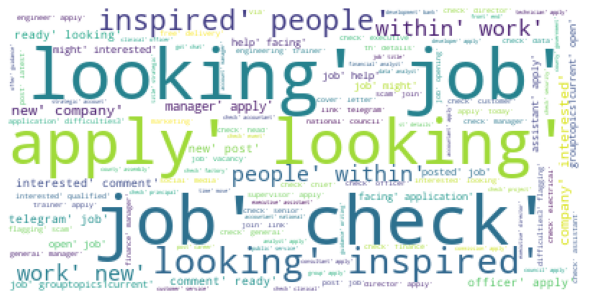

In [21]:

tweets_combo = ' '
# instantiate a word cloud object
for val in tweets_df['Tweet_nonstop']: 
          # typecaste each val to string 
    val = str(val) 
      # split the value 
    tokens = val.split() 
          # Converts each token into lowercase æææ
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    tweets_combo += " ".join(tokens)+" "

tweets_combo
df_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)
# tweets_combo
# tweets_combo =  tweets_combo.replace('ajirake', '').replace('ikokazike', '').replace('via', '').replace('looking', '').replace('opportunities', '').replace('job', '').replace('hiring', '').replace('ajira_ke', '').replace('ikokazi', '').replace('opening', '').replace('apply', '')
# generate the word cloud
df_wc.generate(tweets_combo)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(df_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



In [22]:
#converting data type to string using astype (did not reallly work)
tweets_df['Tweet_token'] = tweets_df['Tweet_token'].astype(str)
tweets_df['Tweet_nonstop'] = tweets_df['Tweet_nonstop'].astype(str)

tweets_df = tweets_df.astype(str)
tweets_df.dtypes

User             object
Location         object
Tweet            object
Tweet_clean      object
Tweet_token      object
Tweet_nonstop    object
dtype: object

In [23]:
#converting the data to string
tweets_df.convert_dtypes(infer_objects=False).dtypes


User             string
Location         string
Tweet            string
Tweet_clean      string
Tweet_token      string
Tweet_nonstop    string
dtype: object

##Preparing data for modelling

How do I intend to find whether the post is job-related or not?
* Finding the most common words and patterns sing CountVectorizer
* Using regex to filter tweets with similiar patterns
* Creating a column that indicates whether tweet is legitimate or not

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


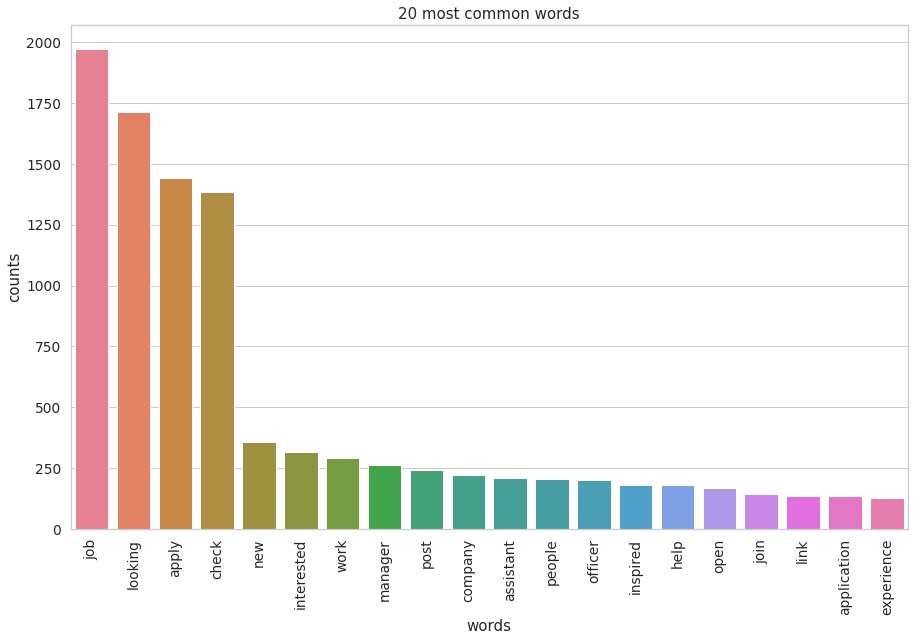

In [24]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the tweets
count_data = count_vectorizer.fit_transform(tweets_df['Tweet_nonstop'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [25]:
#Finding the most common patterns
Counter = Counter(tweets_df['Tweet_nonstop']) 
most_occur = Counter.most_common(30) 
most_occur

[("['']", 171),
 ("['looking', 'inspired', 'people', 'within', 'work', 'new', 'company', 'interested', 'comment', 'ready']",
  120),
 ("['telegram', 'job', 'grouptopics1current', 'open', 'job', 'help', 'facing', 'application', 'difficulties3', 'flagging', 'scam', 'join', 'link']",
  72),
 ("['looking', 'inspired', 'people', 'within', 'work', 'new', 'company', 'interested']",
  60),
 ('[]', 35),
 ("['looking', 'job', 'check', 'general', 'manager', 'apply']", 30),
 ("['looking', 'job', 'check', 'manager', 'apply']", 30),
 ("['looking', 'job', 'check', 'executive', 'assistant', 'apply']", 26),
 ("['looking', 'job', 'check', 'director', 'apply']", 26),
 ("['looking', 'job', 'check', 'finance', 'manager', 'apply']", 26),
 ("['othuolothuol']", 25),
 ("['post']", 20),
 ("['telegram', 'job', 'grouptopics1current', 'open', 'job', 'help', 'facing', 'application']",
  18),
 ("['get']", 18),
 ("['offer', 'guidance', 'writing', 'plan254728426918']", 18),
 ("['kot5aside']", 17),
 ("['looking', 'job'

In [26]:
#Finding patterns in tweets using regex
def map_freq(text):
    freq = "qualified|looking|inspired|people|within|work|new|company|interested|comment|ready|open|job|help|application|check|apply|post|vacancy"
    x = re.findall(freq, text)
    if x:
        return 1
    else:
        return 0

    
tweets_df['Tweet_freq'] =[ map_freq(text) for text in tweets_df['Tweet_nonstop']]
tweets_df


,User,Location,Tweet,Tweet_clean,Tweet_token,Tweet_nonstop,Tweet_freq
0,ikokaziKE,Kenya,Are you a qualified graphic just posted a job ...,Are you a qualified graphic just posted a job ...,"['are', 'you', 'a', 'qualified', 'graphic', 'j...","['qualified', 'graphic', 'posted', 'job', 'mig...",1
1,ikokaziKE,Kenya,Are you a qualified ba Finance501 just posted ...,Are you a qualified ba Finance501 just posted ...,"['are', 'you', 'a', 'qualified', 'ba', 'financ...","['qualified', 'ba', 'finance501', 'posted', 'j...",1
2,ikokaziKE,Kenya,Are you a qualified finance Finance501 just po...,Are you a qualified finance Finance501 just po...,"['are', 'you', 'a', 'qualified', 'finance', 'f...","['qualified', 'finance', 'finance501', 'posted...",1
3,ikokaziKE,Kenya,Are you a qualified graphic design just posted...,Are you a qualified graphic design just posted...,"['are', 'you', 'a', 'qualified', 'graphic', 'd...","['qualified', 'graphic', 'design', 'posted', '...",1
4,ikokaziKE,Kenya,Are you a qualified digital marketing officer ...,Are you a qualified digital marketing officer ...,"['are', 'you', 'a', 'qualified', 'digital', 'm...","['qualified', 'digital', 'marketing', 'officer...",1
...,...,...,...,...,...,...,...
137,ajiraKE,"Nairobi, Kenya",GhettoRadio895 Sheng pia add more,GhettoRadio895 Sheng pia add more,"['ghettoradio895', 'sheng', 'pia', 'add', 'more']","['ghettoradio895', 'sheng', 'pia', 'add']",0
138,ajiraKE,"Nairobi, Kenya",and rocking on Kiss100kenya,and rocking on Kiss100kenya,"['and', 'rocking', 'on', 'kiss100kenya']","['rocking', 'kiss100kenya']",0
139,ajiraKE,"Nairobi, Kenya",is not common sense,is not common sense,"['is', 'not', 'common', 'sense']","['common', 'sense']",0
140,ajiraKE,"Nairobi, Kenya",it should They are actually the worst,it should They are actually the worst,"['it', 'should', 'they', 'are', 'actually', 't...","['actually', 'worst']",0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


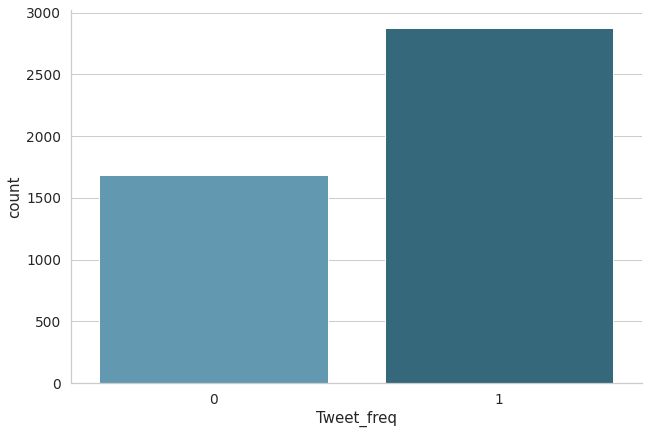

In [27]:
#visualizing the spam vs not spam tweets
sns.factorplot(x="Tweet_freq", data=tweets_df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

##Modeling 
Now let's model our data and see what our model comes up with. What is covered below:
* Splitting data to test and train sets
* Rescaling data with term inverse document frequency (tf-idf) 
* Using Naive Bayes and Random Forest clasifier for data modeling and prediction

In [28]:
#identifying the label
target = tweets_df['Tweet_freq']
#splitting data to test and training sets
X_train, X_test, y_train, y_test = train_test_split(tweets_df['Tweet_nonstop'], target, test_size=0.20, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(27, 4)
(3648,)
(912,)


In [29]:
#converting text with tfidf vectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['a1', 'a3', 'a4', 'a5', 'ability', 'able', 'absence', 'abu', 'abuse', 'academic']


In [30]:
#Naive bayes classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(train_tfIdf, y_train)

pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:30])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]


In [31]:
# Evaluating the model
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2, labels=[1, 2])
print(Conf_metrics_tfidf)

0.8629385964912281
[[554   0]
 [  0   0]]


In [32]:
#Random forest classifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100)

classifier.fit(train_tfIdf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [33]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF, labels=[1, 0])
print(Conf_metrics_RF)

[1 1 1 1 1 1 0 1 0 1]
0.9923245614035088
[[565   6]
 [  1 340]]


##Conclusion

In this notebook, I have done text cleaning, pre-processing,  building and evaluating text classification models using Naive Bayes and Random Forest Algorithms. The performance of the models are as follows:

Naive Bayes Classifier Accuracy  - 86.29%
Random Forest Classifier Accuracy - 99.23%

I have been able to classify whether a job posted on Twitter is legitimate or not.

In [34]:
#Exporting data to my drive 
tweets_df.to_csv('kazimodel.csv')
!cp kazimodel.csv "drive/My Drive/"